In [75]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [76]:
df = pd.read_csv("game data.csv")
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [77]:
df = df.drop(columns=['Days'])
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [79]:
y = df['Wear Jacket?']
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [80]:
x = df.drop(columns=['Wear Jacket?'], axis=1)
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
le = LabelEncoder()

In [ ]:
x.Outlook = le.fit_transform(df['Outlook'])
x.Temprature = le.fit_transform(df['Temprature'])
x.Routine = le.fit_transform(df['Routine'])
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [84]:
model = DecisionTreeClassifier()

In [85]:
model.fit(x,y)

DecisionTreeClassifier()

In [86]:
model.predict([[1, 0, 0]])
#sunny=1, 0=cold, 0=indoor

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [87]:
accuracy_score(y, model.predict(x))

1.0

In [88]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

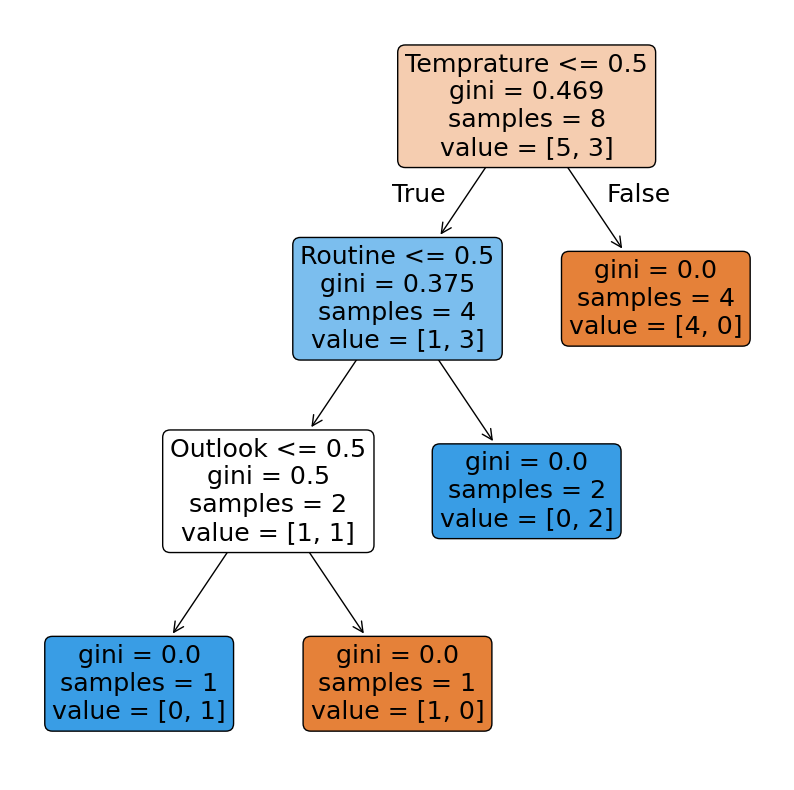

In [91]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(model, filled=True, rounded=True, feature_names=x.columns)